In [2]:
import torch

x = torch.ones(5)  # input tensor
y = torch.zeros(3)  # expected output
w = torch.randn(5, 3, requires_grad = True)
# print(w.shape)
b = torch.randn(3, requires_grad = True)
z = torch.matmul(x, w) + b
loss = torch.nn.functional.binary_cross_entropy_with_logits(z, y)

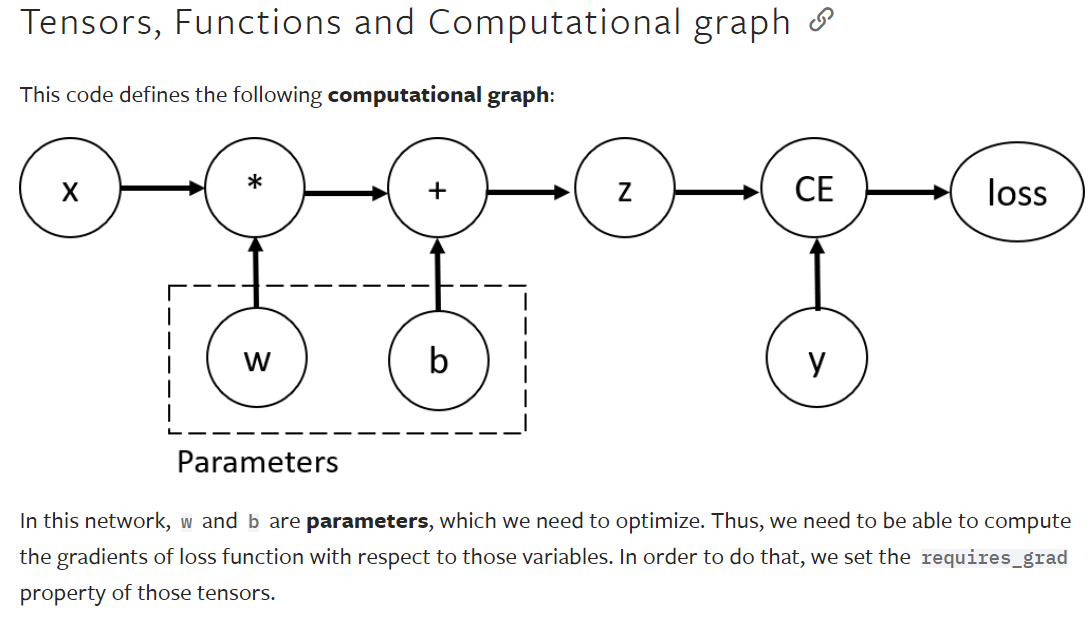

In [3]:
print('Gradient function for z =', z.grad_fn)
print('Gradient function for loss =', loss.grad_fn)

Gradient function for z = <AddBackward0 object at 0x7f1785ba1950>
Gradient function for loss = <BinaryCrossEntropyWithLogitsBackward0 object at 0x7f1785b295d0>


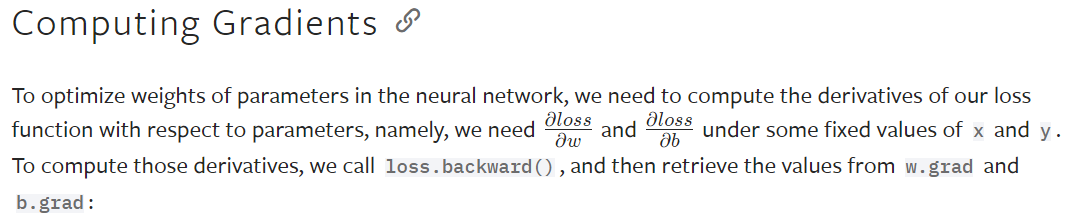

In [4]:
# computing gradients
loss.backward()
print(w.grad)
print(b.grad)

tensor([[0.1077, 0.2321, 0.3309],
        [0.1077, 0.2321, 0.3309],
        [0.1077, 0.2321, 0.3309],
        [0.1077, 0.2321, 0.3309],
        [0.1077, 0.2321, 0.3309]])
tensor([0.1077, 0.2321, 0.3309])


In [5]:
# Disabling Gradient Tracking
z = torch.matmul(x, w) + b
print(z.requires_grad)

with torch.no_grad():
  z = torch.matmul(x, w) + b

print(z.requires_grad)

True
False


In [6]:
 # detach()
 z = torch.matmul(x, w) + b
 z_det = z.detach()
 print(z_det.requires_grad)

False


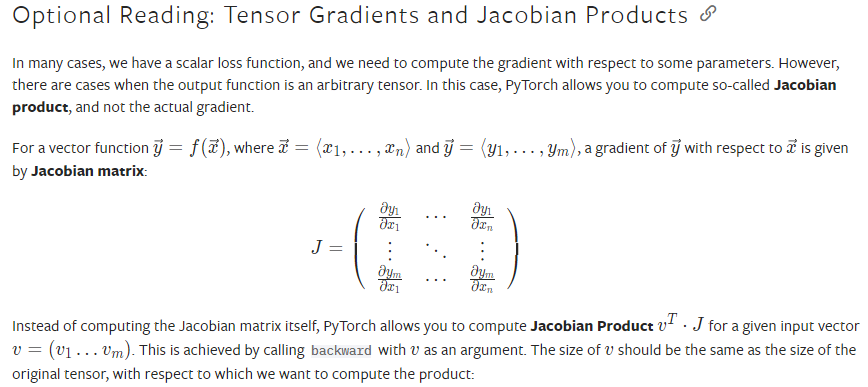

In [22]:
# More on Computational Graphs
inp = torch.eye(5, requires_grad = True)
print(inp)
# print(inp + 1)
out = (inp + 1).pow(2) # element-wise
print(out)
print(torch.ones_like(inp))

out.backward(torch.ones_like(inp), retain_graph=True)
print("First call\n", inp.grad)
out.backward(torch.ones_like(inp), retain_graph = True)
print("\nSecond call\n", inp.grad)

inp.grad.zero_()
out.backward(torch.ones_like(inp), retain_graph=True)
print("\nCall after zeroing gradients\n", inp.grad)

tensor([[1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1.]], requires_grad=True)
tensor([[4., 1., 1., 1., 1.],
        [1., 4., 1., 1., 1.],
        [1., 1., 4., 1., 1.],
        [1., 1., 1., 4., 1.],
        [1., 1., 1., 1., 4.]], grad_fn=<PowBackward0>)
tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])
First call
 tensor([[4., 2., 2., 2., 2.],
        [2., 4., 2., 2., 2.],
        [2., 2., 4., 2., 2.],
        [2., 2., 2., 4., 2.],
        [2., 2., 2., 2., 4.]])

Second call
 tensor([[8., 4., 4., 4., 4.],
        [4., 8., 4., 4., 4.],
        [4., 4., 8., 4., 4.],
        [4., 4., 4., 8., 4.],
        [4., 4., 4., 4., 8.]])

Call after zeroing gradients
 tensor([[4., 2., 2., 2., 2.],
        [2., 4., 2., 2., 2.],
        [2., 2., 4., 2., 2.],
        [2., 2., 2., 4., 2.],
        [2., 2., 2., 2.,